## Question 1

Number of steps is 200


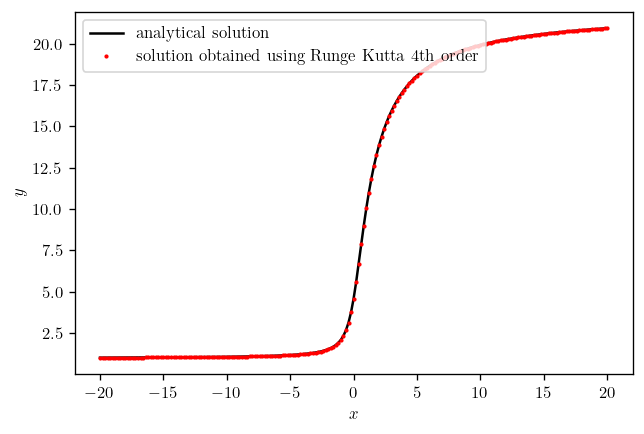

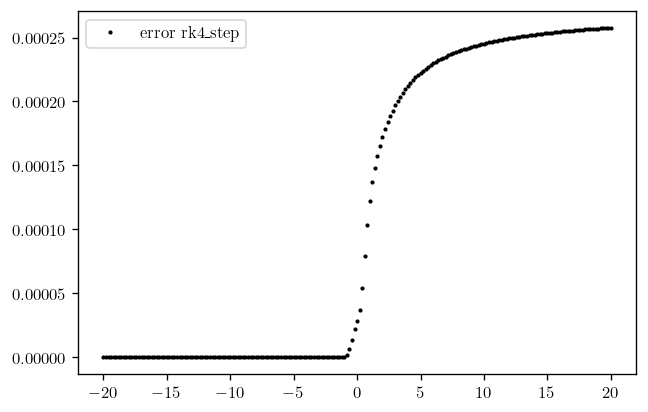

RK4 stepper root mean square error is 0.0001637665315667728


In [31]:
# RK4 stepper
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['figure.dpi'] = 120

# solving dy/dx = y/(1+x**2) using RK4

# ODE to solve
def my_fun(x,y):
    dydx=y/(1+x**2)
    return dydx

# analytical solution
def truth(x):
    return (np.exp(np.arctan(x)))/(np.exp(np.arctan(-20)))

# Runge Kutta 4th order stepper
def rk4_step(fun,x,y,h):
    k1=fun(x,y)*h
    k2=h*fun(x+h/2,y+k1/2)
    k3=h*fun(x+h/2,y+k2/2)
    k4=h*fun(x+h,y+k3)
    dy=(k1+2*k2+2*k3+k4)/6
    return y+dy

# advancing the solution using rk4_step
y0=1
x=np.linspace(-20,20,201)
h=np.median(np.diff(x))
y=np.zeros(len(x))
y[0]=y0
steps = 0
for i in range(len(x)-1):
    y[i+1]=rk4_step(my_fun,x[i],y[i],h)
    steps += 1

# error
err_step = np.abs(y-truth(x))
rmse_step = np.sqrt(np.mean(err_step**2))
print('Number of steps is', steps)
plt.plot(x, truth(x), 'k', label = 'analytical solution')
plt.plot(x,y, 'r.', markersize=3, label = 'solution obtained using Runge Kutta 4th order')
plt.legend(loc = 'upper left')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

plt.plot(x, err_step, 'k.',markersize=3, label = 'error rk4_step')
plt.legend()
plt.show()
print('RK4 stepper root mean square error is', rmse_step)

Now let's do two steps of $h/2$ and one step of $h$ and compare them to cancel out the leading order error term (which is $h^5$). The two numerical approximations are related by:
\begin{align*}
f(x+(h)) &=y =  y_1 + (h)^5 + O(h^6)\\
f(x+2(h/2)) &=y =  y_2 +2(h/2)^5 + O(h^6).
\end{align*}
The first equation is the error for the big step of $2h$ and the second equation is the error for two small stepts of $h$. If we drop the $O(h^6)$, we can try to solve for a combination of $y_1$ and $y_2$ that will cancel the leading order error in $h^5$.

We have,
\begin{equation*}
y_2 -\frac{y_1}{16} =y-\frac{h^5}{16}-(\frac{y}{16}-\frac{h^5}{16}) = \frac{15y}{16}.
\end{equation*}
Now rearanging to find $y$ in terms of $y_1$ and $y_2$ we have that
\begin{equation}
y = \frac{16y_2-y_1}{15}.
\end{equation}
We can use Equation (1) to get a better numerical integration of our ODEs using RK4.

The normal RK4 stepper uses 4 function evaluations per step, so 800 evaluations for 200 steps. This new adaptive stepper takes 4 functions evaluations for the 3 calls, every step, but they all share the same starting point, so 11 evaluations per step. For fairness, we want to use the same amount of function evaluations to compare both methods, so with the adaptive method we need 73 steps to reach 800 function evaluations.

The number of is 73


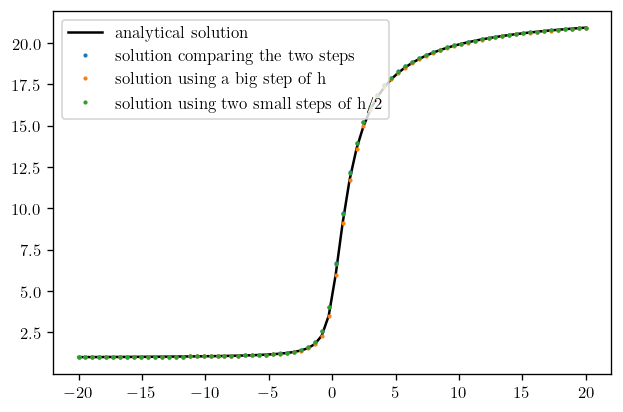

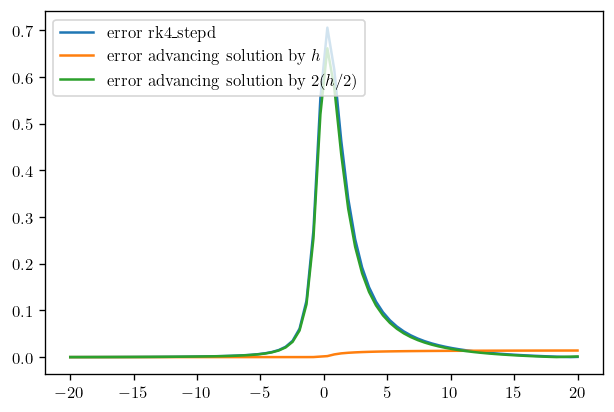

The rms error for comparing the two steps is: 0.15503707680896503
The rms error for using a big step of h is: 0.008972594144552778
the rms error for using two small steps of h/2 0.1451947612230162


In [35]:
# adaptive RK4 stepper
y0=1
x=np.linspace(-20,20,74)
h=40/73
yd=np.zeros(len(x))
y1=np.zeros(len(x))
y2=np.zeros(len(x))
yd[0]=y0
y1[0]=y0
y2[0]=y0

steps = 0
for i in range(len(x)-1):
    y2[i+1] = rk4_step(my_fun,x[i],y2[i],h/2) # two smaller steps of RK4
    y2[i+1] = rk4_step(my_fun,x[i+1],y2[i+1],h/2)
    y1[i+1] = rk4_step(my_fun,x[i], y1[i], h) # normal step of RK4

    yd[i+1] = (16*y2[i+1]-y1[i+1])/15
    steps += 1

err_stepd = np.abs(yd-truth(x))
rmse_stepd = np.sqrt(np.mean(err_stepd**2))
err_y2 = np.abs(y2-truth(x))
rmse_y2 = np.sqrt(np.mean(err_y2**2))
err_y1 = np.abs(y1-truth(x))
rmse_y1 = np.sqrt(np.mean(err_y1**2))


print('The number of is', steps)
plt.plot(x, truth(x), 'k', label = 'analytical solution')
plt.plot(x,yd,'.', markersize=3, label ='solution comparing the two steps')
plt.plot(x,y1, '.', markersize=3, label = 'solution using a big step of h')
plt.plot(x,y2, '.', markersize=3, label = 'solution using two small steps of h/2')
plt.legend()
plt.show()

plt.plot(x, err_stepd, '-',markersize=3, label = 'error rk4_stepd')
plt.plot(x, err_y1, '-',markersize=3, label = 'error advancing solution by $h$')
plt.plot(x, err_y2, '-',markersize=3, label = 'error advancing solution by $2(h/2)$')
plt.legend(loc = 'upper left')
plt.show()
print('The rms error for comparing the two steps is:', rmse_stepd)
print('The rms error for using a big step of h is:', rmse_y1)
print('the rms error for using two small steps of h/2', rmse_y2)


This is much worse, for the same number of function evaluations, than just using a step of length h. I have a feeling that this should not be the case, and there is something wrong with my code. I think that something goes wrong when I take the two steps of h/2, because a solution using these small steps has a rmse of 0.14, while a solution using only big steps of h has a rmse of 0.009. I have not been able to resolve that. 

I've also checked for the same number of steps (200) and the adaptive method of comparing the step size still gives an error that is worse than just using a big step of $h$ for some reason.